# Creating Synthetic dataset

https://towardsdatascience.com/time-series-analysis-creating-synthetic-datasets-cf008208e014

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

%matplotlib inline

In [5]:
def plot_time_series(time, values, label):
    plt.figure(figsize=(10,6))
    plt.plot(time, values)
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Value", fontsize=20)
    days = int(len(time)/287)
    for day in range(0, days):
        plt.axvline(x=day*287, color='b', label=f'day {day}', linestyle='dashed')
    plt.title(label, fontsize=20)
    plt.grid(True)
    plt.legend()

## Trend time series

In [4]:
# Time slots 5 minutes
day = (60/5)*24
month = 30*day
year = 12*month

print(f"[5min] Slots in a day: {day}")
print(f"[5min] Slots in a month: {month}")
print(f"[5min] Slots in a year: {year}")

in] Slots in a day: 288.0
in] Slots in a month: 8640.0
in] Slots in a year: 103680.0


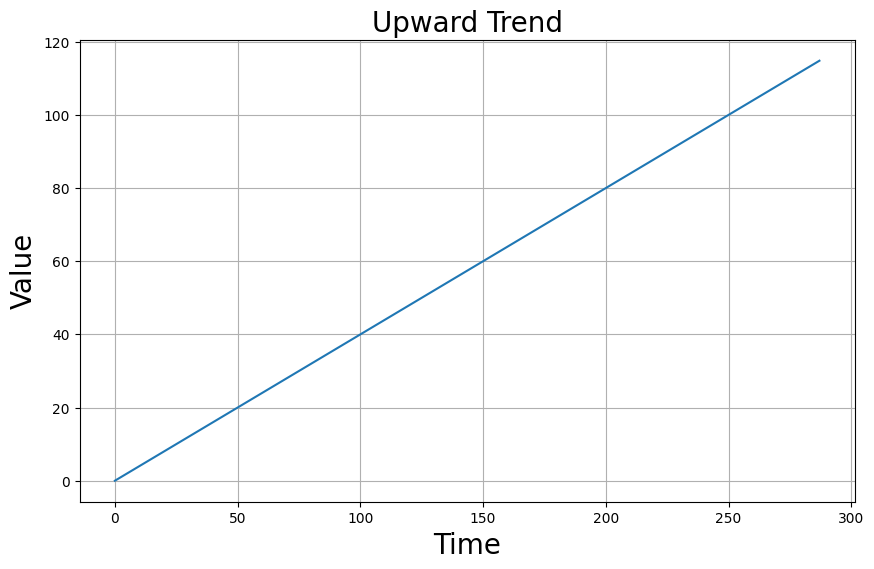

In [8]:
# Example trend
time = np.arange(day)
values = time*0.4

plot_time_series(time, values, "Upward Trend")

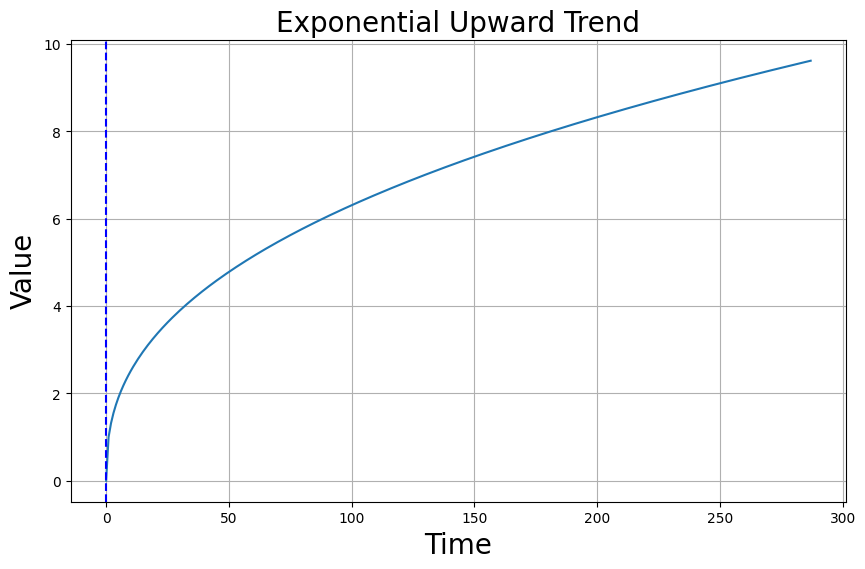

In [38]:
# Exponential upward trend
time = np.arange(day)
values = time**0.4

plot_time_series(time, values, "Exponential Upward Trend")

## Add seasonality

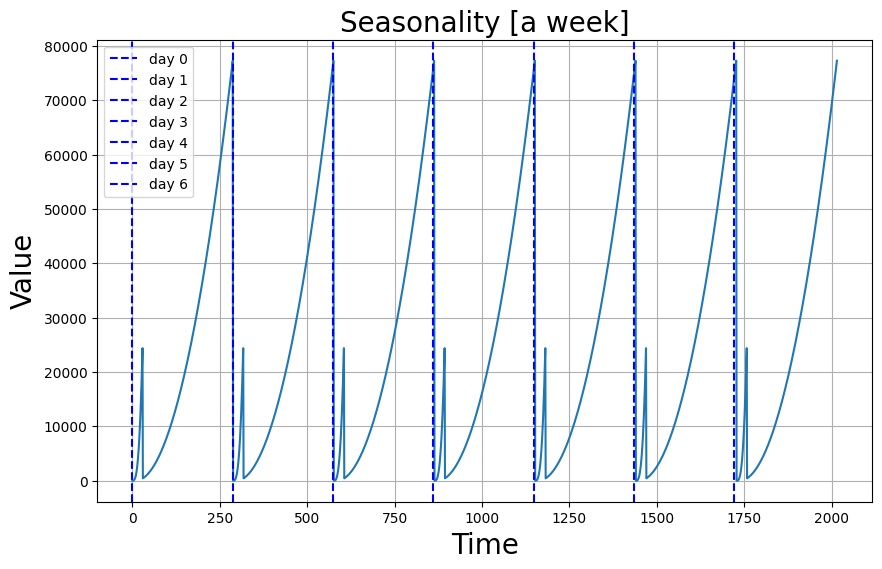

In [56]:
# Just a random pattern
time = np.arange(day)
values = np.where(time < 30, time**3, (time-9)**2)

# Repeat the pattern 7 times [a week]
seasonal = []
for i in range(7):
    for j in range(int(day)):
        seasonal.append(values[j])
        
# Plot
time_seasonal = np.arange(day*7)
plot_time_series(time_seasonal, seasonal, label="Seasonality [a week]")

## Random Noise

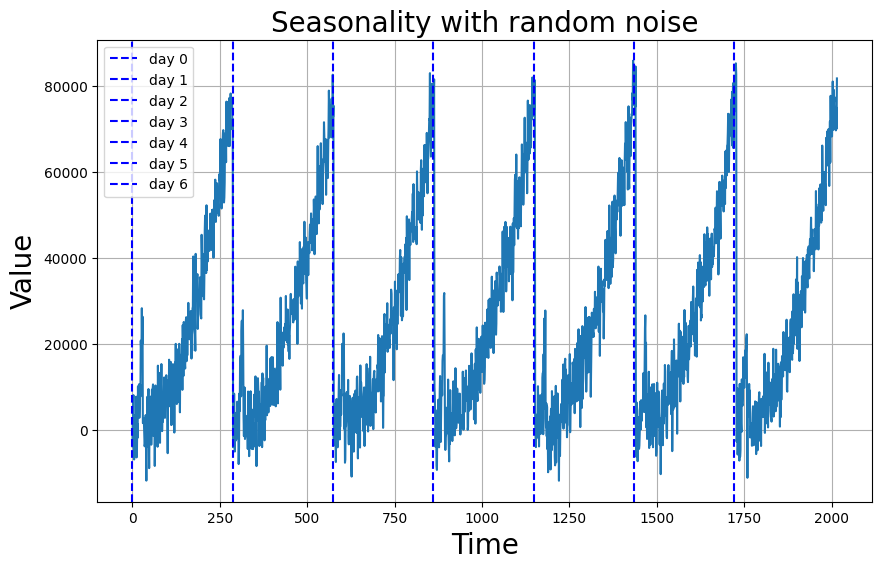

In [65]:
noise = np.random.randn(int(day*7))*5000
seasonal += noise

time_seasonal = np.arange(day*7)

plot_time_series(time_seasonal, seasonal, label="Seasonality with random noise")

## Multiple patterns

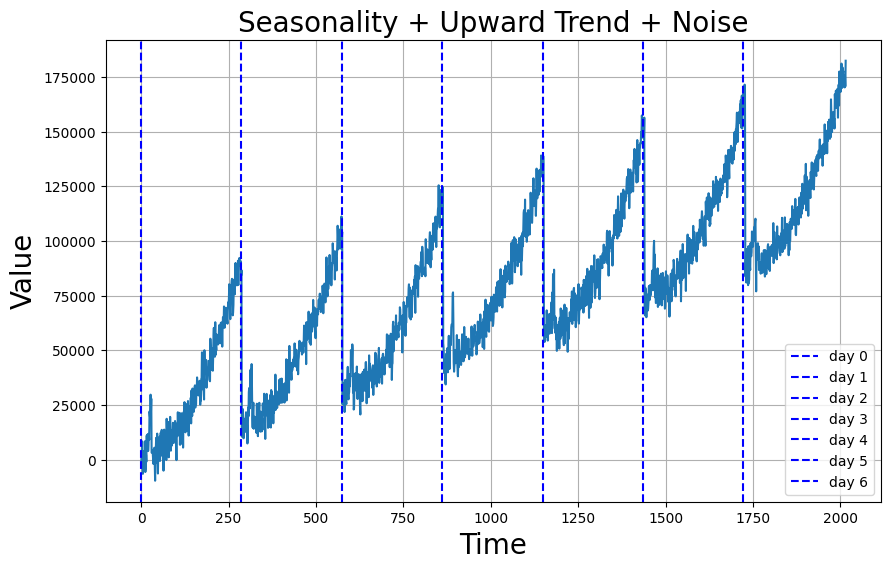

In [66]:
seasonal_upward = seasonal + np.arange(int(day*7))*50

time_seasonal = np.arange(int(day*7))
plot_time_series(time_seasonal, seasonal_upward, label="Seasonality + Upward Trend + Noise")

## White Noise


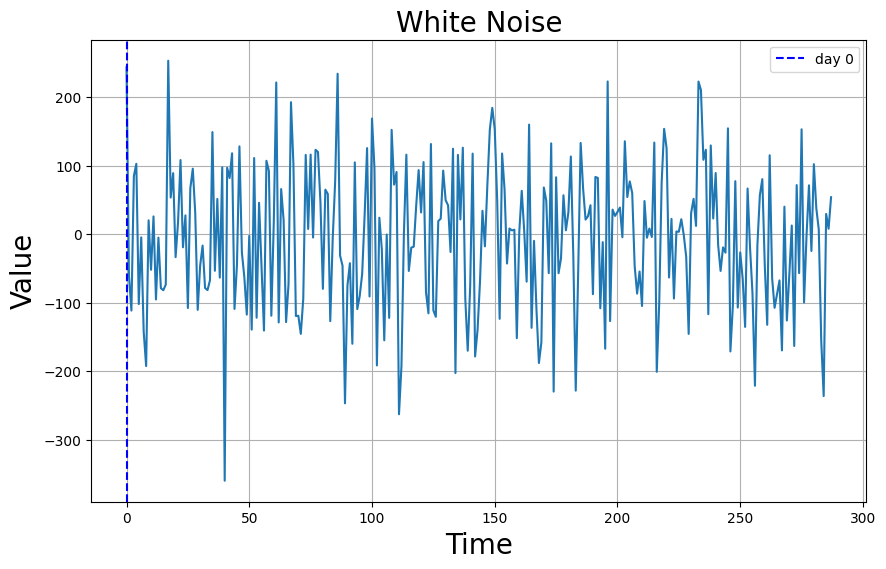

In [68]:
time = np.arange(day)
values = np.random.randn(int(day))*100

plot_time_series(time, values, label="White Noise")

## Non-stationary Time Series

Size: 2016


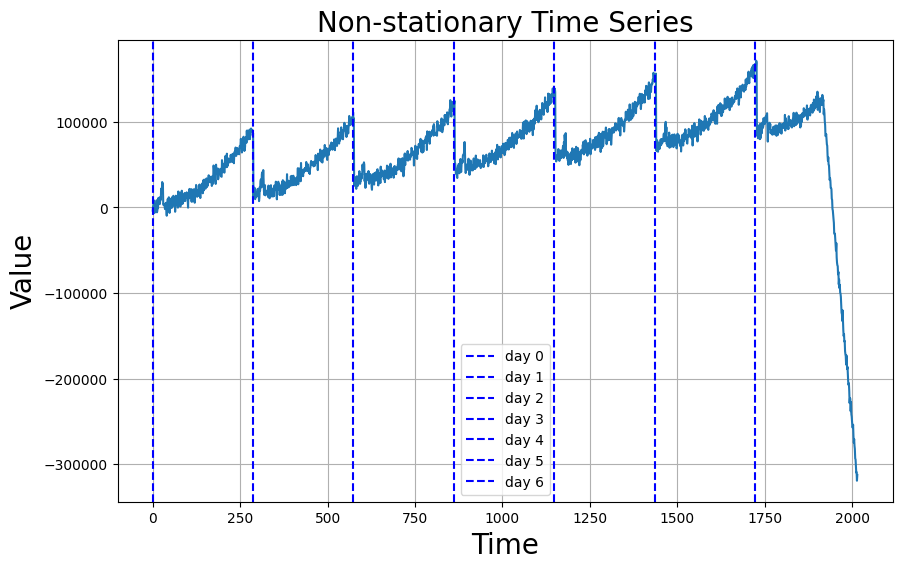

In [85]:
big_event = np.zeros(int(day)*7)
#big_event[-100:] = np.arange(100)*-500
big_event[-100:] = np.arange(100)*-5000

print(f"Size: {len(big_event)}")

non_stationary = seasonal_upward + big_event

time_seasonal = np.arange(day*7)
plot_time_series(time_seasonal, non_stationary, label="Non-stationary Time Series")

## Try cosine wave form

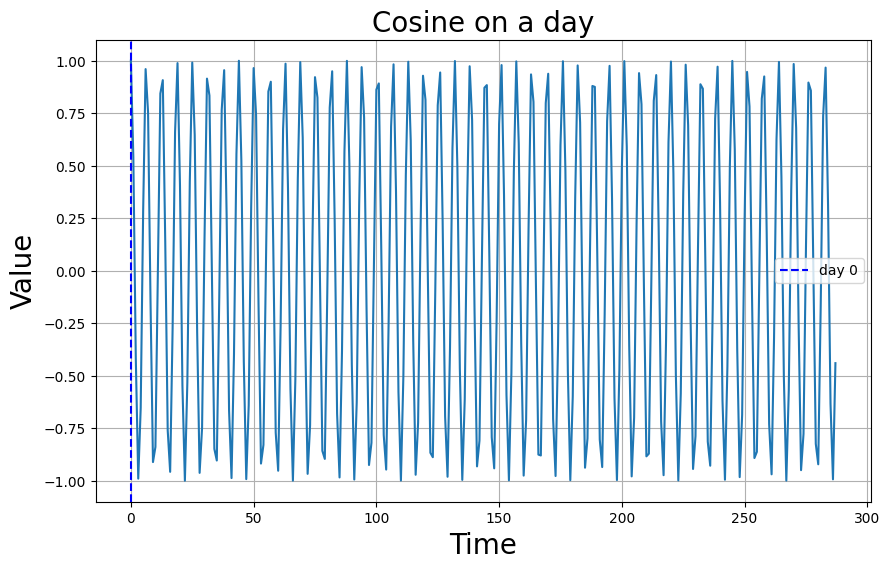

In [7]:
time = np.arange(0, day)
amplitude = np.cos(time)

plot_time_series(time, amplitude, label="Cosine on a day")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


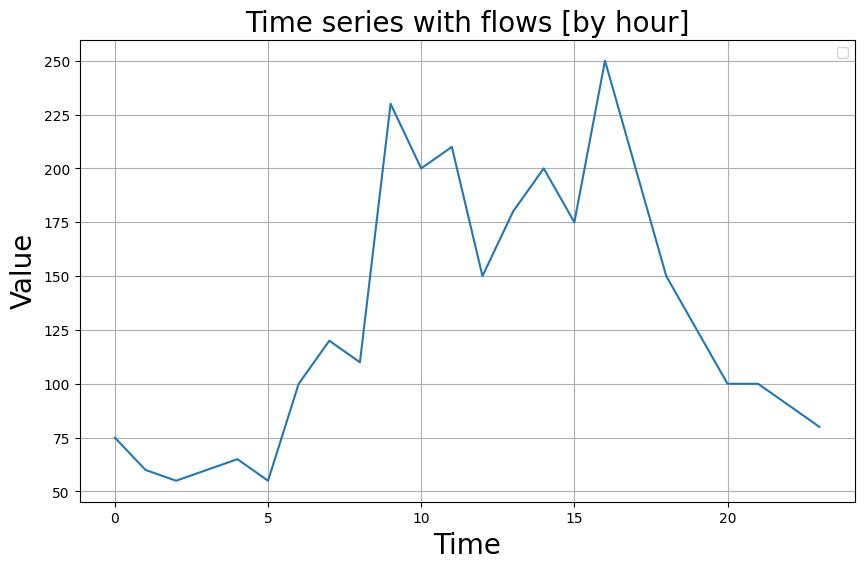

In [18]:
df = pd.read_csv('./data_test/flow_day_hour.csv')

plot_time_series(df['time'], df['flow'], label="Time series with flows [by hour]")